In [101]:
import pandas as pd
import re
df = pd.read_csv("https://bern.dwyer.co.za")

def get_price(price):
    words = price.split()
    if price.startswith("CHF "):
        int_price = words[1].replace('’', '')
        int_price = float(int_price)
        return int_price
    return None

def get_post_code(address):
    reg_postcode = r"\d\d\d\d "
    # if there is a four digit house number, then the post code will be the last match
    postcode = re.findall(reg_postcode, address)[-1].strip()
    return postcode
    
def get_city(address):
    reg_postcode = r"\d\d\d\d "
    # if there is a four digit house number, then the post code will be the last match
    comps = re.split(reg_postcode, address)
    return comps[-1]  

def get_num_rooms(rooms):
    try:
        if rooms.startswith(","):
            return None
        # either `1 rooms , 56m2` or 
        # `1 rooms`
        rms, _ = rooms.split(" , ")
        int_rooms = float(rms.split()[0])
        if "½" in rooms:
            int_rooms += 0.5
        return int_rooms
    except:
        return None
    
def get_size(rooms):
    try:
        _, sqm = rooms.split(", ")
        int_sqm = sqm.split("m²")[0]
        return int_sqm
    except Exception as e:
        return None
    
def is_shared(description):
    return " shared " in description.lower()

def is_temporary(additional_info):
    try:
        return "temporary" in additional_info.lower()
    except:
        return False

def is_furnished(additional_info):
    try:
        return "furnished" in additional_info.lower()
    except:
        return False

df['price'] = df['price'].apply(get_price)
df['post_code'] = df['address'].apply(get_post_code)
df['city'] = df['address'].apply(get_city)
df['num_rooms'] = df['rooms'].apply(get_num_rooms)
df['size'] = df['rooms'].apply(get_size)
df['shared'] = df['description'].apply(is_shared)
df['temporary'] = df['additional_info'].apply(is_temporary)
df['furnished'] = df['additional_info'].apply(is_furnished)
df = df.drop(columns=['url', 'description', 'address', 'additional_info', 'rooms', 'reference'])
df.to_csv("bern_clean.csv")

<AxesSubplot:xlabel='num_rooms'>

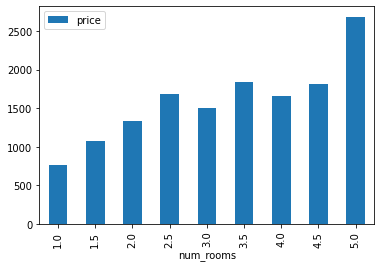

In [83]:
df[['num_rooms', 'price']].groupby('num_rooms').mean().plot.bar()


<AxesSubplot:xlabel='num_rooms'>

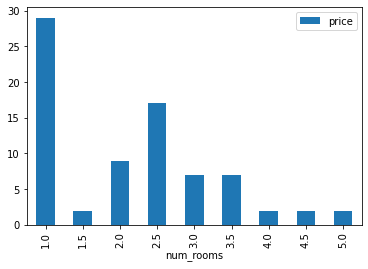

In [84]:
df[['num_rooms', 'price']].groupby('num_rooms').count().plot.bar()



In [56]:
df

,date,description,address,additional_info,price,rooms,post_code,city,num_rooms,size,shared
0,2021-04-09T11:10:56.103828,3 rooms apartment,"Schermenweg 182, 3072 Ostermundigen",NaN,1310.0,"3 rooms , 65m²",3072,Ostermundigen,3.0,65,False
1,2021-04-09T15:39:18.600911,2 ½ rooms apartment,"Grauholzstr. 78, 3063 Ittigen",NaN,1250.0,"2 ½ rooms , 68m²",3063,Ittigen,2.5,68,False
2,2021-04-09T15:39:18.600982,2 ½ rooms apartment,"Grauholzstr. 78, 3063 Ittigen",NaN,1250.0,"2 ½ rooms , 68m²",3063,Ittigen,2.5,68,False
3,2021-04-09T15:39:18.601030,4 ½ rooms apartment,"Grauholzstr. 76, 3063 Ittigen",NaN,1710.0,"4 ½ rooms , 113m²",3063,Ittigen,4.5,113,False
4,2021-04-09T17:01:22.411888,2 rooms apartment,"Murtenstrasse 143 B, 3008 Bern",NaN,1350.0,"2 rooms , 40m²",3008,Bern,2.0,40,False
...,...,...,...,...,...,...,...,...,...,...,...
109,2021-04-21T18:47:59.301673,2 ½ rooms apartment,"Nelkenweg 8, 3006 Bern",NaN,1450.0,"2 ½ rooms , 60m²",3006,Bern,2.5,60,False
110,2021-04-21T20:54:29.044923,1 room apartment,"Indermühleweg 17, 3018 Bern",NaN,760.0,1 rooms,3018,Bern,NaN,None,False
111,2021-04-21T21:27:25.334129,2 ½ rooms apartment,"Hilfikerstrasse 4, 3014 Bern",NaN,1750.0,"2 ½ rooms , 56m²",3014,Bern,2.5,56,False
112,2021-04-22T00:21:51.388978,Underground slot,"Wabernstrasse 41, 3007 Bern",NaN,120.0,NaN,3007,Bern,NaN,None,False


In [33]:
s = "street name, 4201, 3002 Somethign by Bern"



get_post_code(s)

'3002'

In [25]:
re.findall(postcode, s)[-1].strip()

'3002'

In [ ]:
def get_num_rooms(description):
    try:
        if "Room in a shared" in description:
            return 1
        comps = description.split()

        if comps[1] in ("rooms", "room"):
            num_rooms = float(comps[0])
            return num_rooms

        if comps[2] in ("rooms", "room") and comps[1] == "½":
            num_rooms = float(comps[0]) + 0.5
            return num_rooms
    except IndexError as ie:
        return None


def test_get_rooms():
    tests = {
        "3 rooms apartment": 3.0,
        "2 ½ rooms apartment": 2.5,
        "1 room apartment": 1,
        "Underground slot": None,
        "Room in a shared flat": 1}
    
    for test in tests:
        assert get_num_rooms(test) == tests[test]